# 2 - Gaussian RNG

##### Imports:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics 

##### Configure matplotlib settings

In [33]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (10, 8),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
    "lines.markersize" : 10,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

##### Functions:

In [34]:
def gaussian(t, mu = 0, sigma = 1):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-((t-mu)/sigma)**2/2)

## 2.1 - Box Muller transformation for $\mu = 0$ and $\sigma = 1$

The inverse function for the probability integral transformation is $F^{-1}(x) = \left(-2\log(1-x)\right)^{1/2}$.

In [35]:
def f(x):
    return (-2*np.log(1-x))**0.5

In [36]:
def generate_gaussian_numbers():
    theta = random.uniform(0, 2*np.pi)
    u = random.uniform(0, 1)
    r = f(u)
    
    x = r*np.cos(theta); y = r*np.sin(theta)
    
    return (x, y)

In [37]:
xdata = []
ydata = []
npts = 10**5

for i in range(npts):
    point = generate_gaussian_numbers()
    xdata.append(point[0])
    ydata.append(point[1])

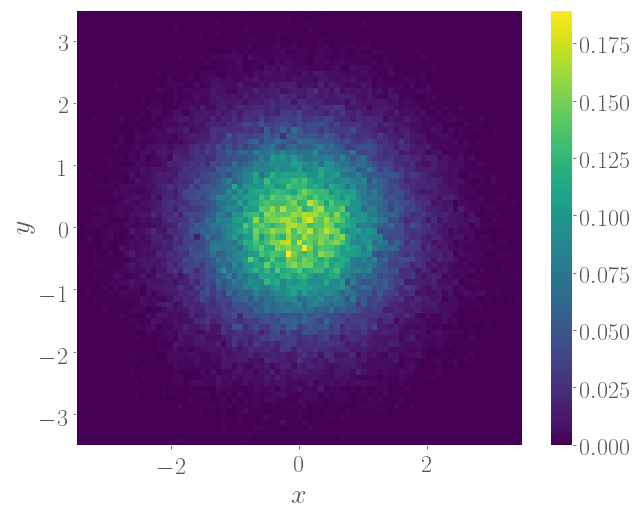

In [38]:
plt.hist2d(xdata, ydata, normed = True, bins = 100)
plt.colorbar()
#plt.title(r"2D  histogram, npts = %d" %npts)
plt.xlabel(r'$x$')
plt.xlim(-3.5, 3.5)
plt.ylabel(r'$y$')
plt.ylim(-3.5, 3.5)
plt.savefig("ex2_2D_density.pdf", bbox_inches = 'tight')
plt.show()

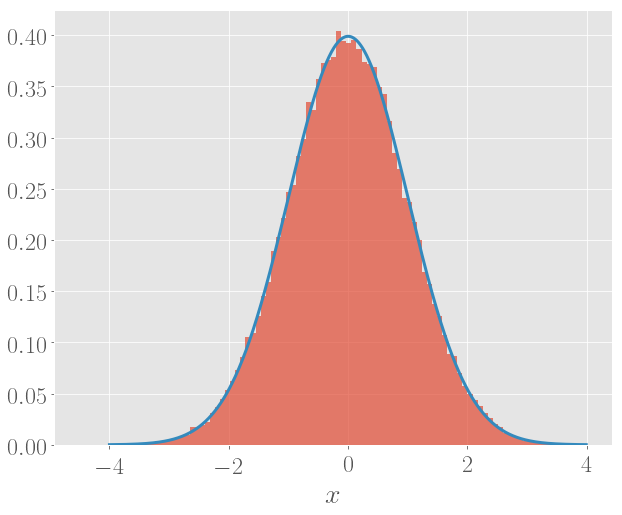

In [39]:
plt.hist(xdata, density = True, bins = 100, alpha = 0.7)
t = np.arange(-4, 4, 0.01)
y = gaussian(t)
plt.plot(t, y)
plt.xlabel(r'$x$')
#plt.title(r'Histogram of $x$ data, npts = %d' % npts)
plt.savefig("ex2_1D_density_x.pdf", bbox_inches = 'tight')
plt.show()

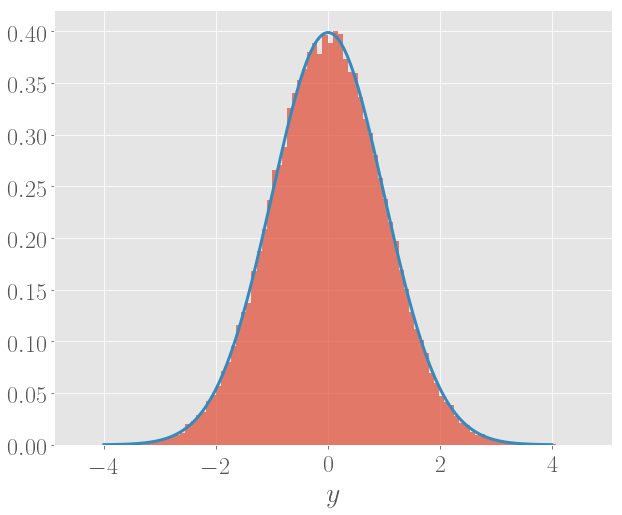

In [40]:
plt.hist(ydata, density = True, bins = 100, alpha = 0.7)
t = np.arange(-4, 4, 0.01)
y = gaussian(t)
plt.plot(t, y)
plt.xlabel(r'$y$')
#plt.title(r'Histogram of $y$ data, npts = %d' % npts)
plt.savefig("ex2_1D_density_y.pdf", bbox_inches = 'tight')
plt.show()

## 2.2 - Arbitrary $\mu$ and $\sigma$

In [41]:
def generate_gaussian_numbers2(mu, sigma):
    theta = random.uniform(0, 2*np.pi)
    x = random.uniform(0, 1)
    r = f(x)
    
    return (mu + sigma*(r*np.cos(theta)), mu+sigma*(r*np.sin(theta)))

In [42]:
mu = 2
sigma = 1.5

xdata = []
ydata = []
npts = 10**5

for i in range(npts):
    point = generate_gaussian_numbers2(mu, sigma)
    xdata.append(point[0])
    ydata.append(point[1])

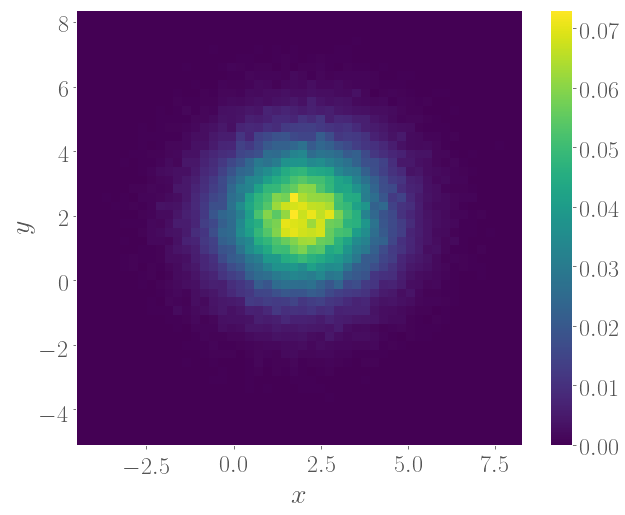

In [43]:
plt.hist2d(xdata, ydata, normed = True, bins = 50)
#plt.title(r'2D histogram: npts = %d , $\mu$ = %0.2f , $\sigma$ = % 0.2f' % (npts, mu, sigma))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
plt.savefig("ex2_2D_density_arbitrary.pdf", bbox_inches = 'tight')
plt.show()

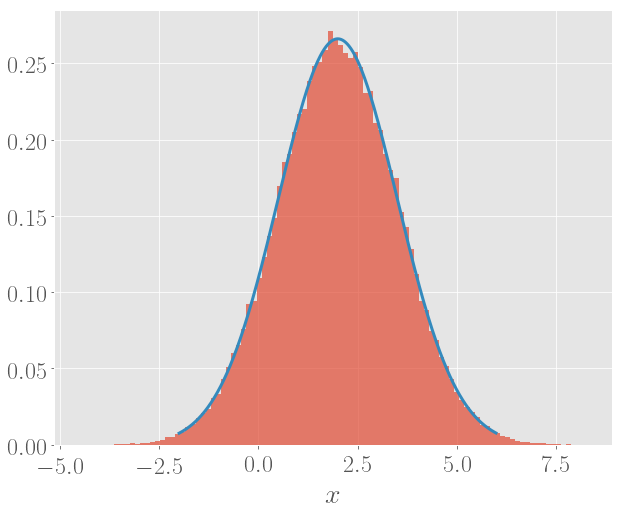

In [44]:
plt.hist(xdata, density = True, bins = 100, alpha = 0.7)
t = np.arange(mu - 4, mu + 4, 0.01)
y = gaussian(t, mu, sigma)
plt.plot(t, y)
#plt.title(r'Density plot of $x$ data, npts = '%npts)
plt.xlabel(r'$x$')
plt.savefig("ex2_1D_density_arbitrary_x.pdf", bbox_inches = 'tight')
plt.show()

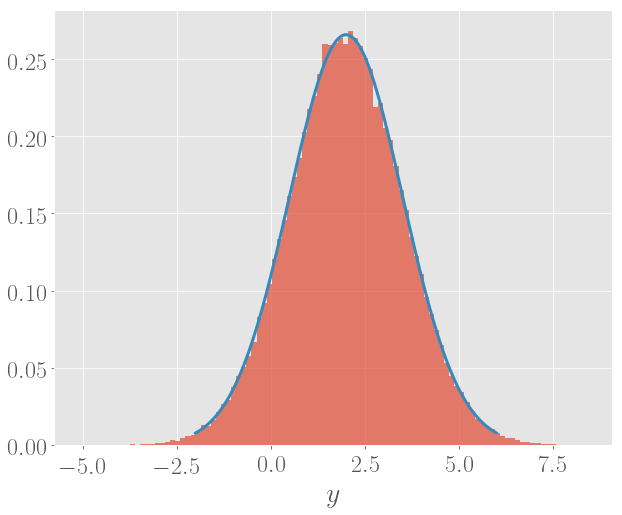

In [45]:
plt.hist(ydata, density = True, bins = 100, alpha = 0.7)
t = np.arange(mu - 4, mu + 4, 0.01)
y = gaussian(t, mu, sigma)
plt.plot(t, y)
plt.xlabel(r'$y$')
plt.savefig("ex2_1D_density_arbitrary_y.pdf", bbox_inches = 'tight')
#plt.title(r'Density plot of $y$ data, npts = %d'%npts)
plt.show()